In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
read_city_data_df = pd.read_csv(city_data_to_load)
read_ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(read_ride_data_df, read_city_data_df, on="city")

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Set index by type of city
df = combined_data_df.set_index("type")

In [3]:
# Create df for Urban type
urban_df = df.loc[["Urban"],["city","fare","ride_id","driver_count"]]

# Create df for Suburban type
suburban_df = df.loc[["Suburban"],["city","fare","ride_id","driver_count"]]

# Create df for Rural type
rural_df = df.loc[["Rural"],["city","fare","ride_id","driver_count"]]


In [4]:
# Total rides per city
urban_total_rides_per_city = urban_df.groupby("city").count()["ride_id"]
suburban_total_rides_per_city = suburban_df.groupby("city").count()["ride_id"]
rural_total_rides_per_city = rural_df.groupby("city").count()["ride_id"]


In [5]:
# Average fare per city
urban_avg_fare_per_city = urban_df.groupby("city").mean()["fare"]

suburban_avg_fare_per_city = suburban_df.groupby("city").mean()["fare"]

rural_avg_fare_per_city = rural_df.groupby("city").mean()["fare"]


In [6]:
# Driver count per city
total_driver_count_per_city = df.groupby("city").mean()["driver_count"]
urban_driver_count_per_city = urban_df.groupby("city").mean()["driver_count"]
suburban_driver_count_per_city = suburban_df.groupby("city").mean()["driver_count"]
rural_driver_count_per_city = rural_df.groupby("city").mean()["driver_count"]


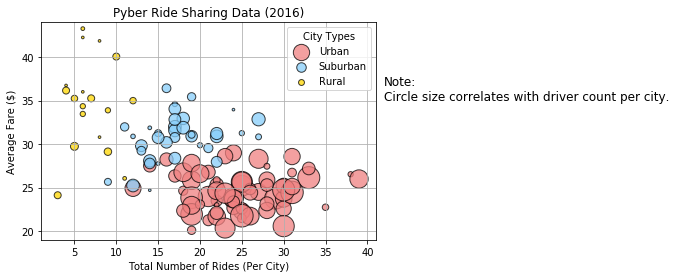

In [7]:
# Incorporate the other graph properties - grid, axes labels, axes limits, title
plt.grid()
plt.xlim(1,41)
plt.ylim(19,44)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Build the scatter plots for each city types
plt.scatter(urban_total_rides_per_city, urban_avg_fare_per_city, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urban_driver_count_per_city*7, alpha=0.75, label='x', linewidth = 1)
plt.scatter(suburban_total_rides_per_city, suburban_avg_fare_per_city, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=suburban_driver_count_per_city*7, alpha=0.75, linewidth = 1)
plt.scatter(rural_total_rides_per_city, rural_avg_fare_per_city, marker="o", facecolors="gold", edgecolors="black",
            s=rural_driver_count_per_city*7, alpha=0.75, linewidth = 1)

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.", fontsize=12)

# Add a legend
labels = ['Urban','Suburban','Rural']
plt.legend(labels,title='City Types')

# Save Figure and show plot
plt.savefig("bubble_plot.png")
plt.show()

## Total Fares by City Type

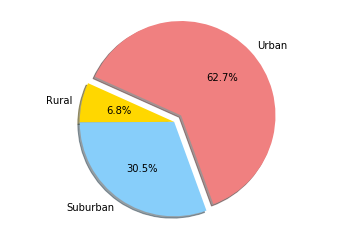

In [8]:
# Calculate Fares by City Type Percents
total_fares = combined_data_df.sum()["fare"]

urban_total_fares = urban_df.sum()["fare"]
suburban_total_fares = suburban_df.sum()["fare"]
rural_total_fares = rural_df.sum()["fare"]

urban_percent_fares = urban_total_fares/total_fares * 100
suburban_percent_fares = suburban_total_fares/total_fares * 100
rural_percent_fares = rural_total_fares/total_fares * 100

city_types = ["Urban","Rural","Suburban"]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1,0,0)

# Build Pie Chart
city_percents_fares = [urban_percent_fares,rural_percent_fares,suburban_percent_fares]
plt.pie(city_percents_fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("total_fares_by_city_type.png")
plt.show()

## Total Rides by City Type

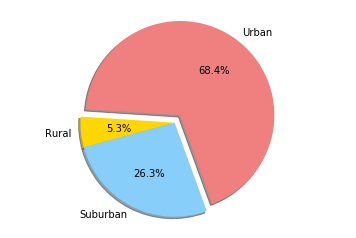

In [9]:
# Calculate Rides by City Type Percents
total_rides = combined_data_df.nunique()["ride_id"]

urban_total_rides = urban_df.nunique()["ride_id"]
suburban_total_rides = suburban_df.nunique()["ride_id"]
rural_total_rides = rural_df.nunique()["ride_id"]

urban_percent_rides = urban_total_rides/total_rides * 100
suburban_percent_rides = suburban_total_rides/total_rides * 100
rural_percent_rides = rural_total_rides/total_rides * 100

# Build Pie Chart
city_percents_rides = [urban_percent_rides,rural_percent_rides,suburban_percent_rides]
plt.pie(city_percents_rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("total_rides_by_city_type.png")
plt.show()

In [10]:
## Total Drivers by City Type

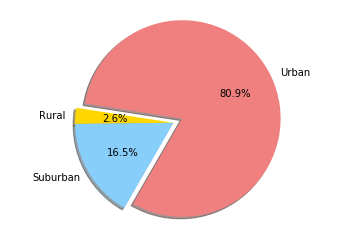

In [11]:
# Calculate drivers by city type
total_drivers = total_driver_count_per_city.sum()

urban_total_drivers = urban_driver_count_per_city.sum()
suburban_total_drivers = suburban_driver_count_per_city.sum()
rural_total_drivers = rural_driver_count_per_city.sum()

urban_percent_drivers = urban_total_drivers/total_drivers * 100
suburban_percent_drivers = suburban_total_drivers/total_drivers * 100
rural_percent_drivers = rural_total_drivers/total_drivers * 100

# Calculate Drivers by City Type Percents
urban_percent_drivers = urban_total_drivers/total_drivers * 100
suburban_percent_drivers = suburban_total_drivers/total_drivers * 100
rural_percent_drivers = rural_total_drivers/total_drivers * 100 

# Build Pie Chart
city_percents_drivers = [urban_percent_drivers,rural_percent_drivers,suburban_percent_drivers]
plt.pie(city_percents_drivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("total_drivers_by_city_type.png")
plt.show()